In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NLP Imports
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('../project-5/clean_df.csv')
df

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,i m going to have to disagree with the previou...


#### Y is sentiment, coded as 1 for positive and 0 for negative

In [3]:
y = df['sentiment'].map({'positive' : 1, 'negative' : 0})
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [4]:
X = df['review_clean'] #Doesn't need 2 [[]] brackets
X

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review_clean, Length: 50000, dtype: object

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500,), (12500,), (37500,), (12500,))

In [6]:
X_train.head()

17949    i just saw adam had four sons for the first ti...
5786     i for one have shamelessly enjoyed every episo...
42175    this movie is a journey through the mind of a ...
39484    this was absolutely one of the best movies i v...
34209    oh geez there are so many other films i want t...
Name: review_clean, dtype: object

In [7]:
y_train

17949    0
5786     1
42175    1
39484    1
34209    0
        ..
1950     1
22917    0
47481    0
35597    0
27491    0
Name: sentiment, Length: 37500, dtype: int64

In [8]:
pipe = Pipeline([
    ('cvec', CountVectorizer() ),
    ('lr', LogisticRegression() )
])

#Dropped None stop words, max features at 2500 and 25000 and ngram range 1,3 to have fewer fits
pipe_params = {
    'cvec__stop_words' : ['english'],
    'cvec__max_features' : [5000, 10_000, 15_000, 20_000],
    # 'cvec__min_df' : [2, 4, 8, 10, 20],
    'cvec__ngram_range' : [ (1,1), (1,2) ],
}

In [15]:
pipe.fit(X_train, y_train)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cvec', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe.score(X_test, y_test)

0.8928

In [23]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('lr', LogisticRegression())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'lr': LogisticRegression(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

# Pipeline Model Evaluation

In [25]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.95904, 0.8928)

In [27]:
pipe_pred = pipe.predict(X_test)

In [29]:
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, pipe_pred).ravel()

# Specificity

specificity = true_neg / (true_neg + false_pos)
print(f'Our model specificity: {specificity} ')

Our model specificity: 0.8904 


In [30]:
false_pos, false_neg

(685, 655)

In [32]:
recall = true_pos / (true_pos + false_neg)
recall

0.8952

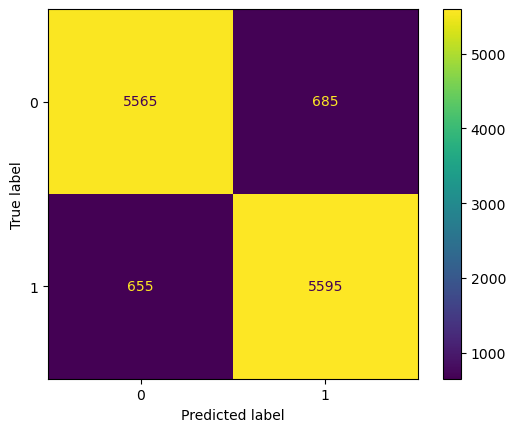

In [33]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test);

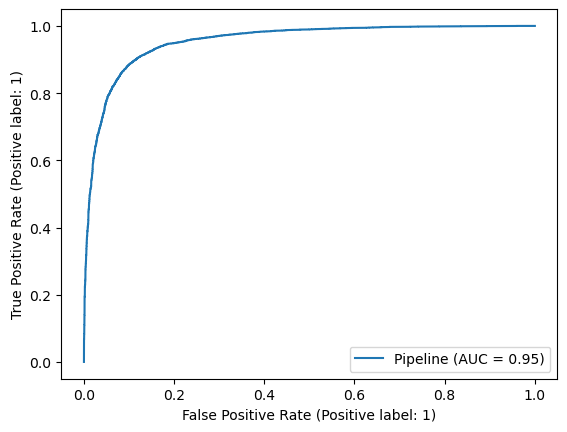

In [34]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test);

In [43]:
# The predict probas for the features from the model
pipe.predict_proba(pipe[:-1].get_feature_names_out())

array([[0.47171384, 0.52828616],
       [0.53484501, 0.46515499],
       [0.49434098, 0.50565902],
       ...,
       [0.49364521, 0.50635479],
       [0.49337081, 0.50662919],
       [0.49428893, 0.50571107]])

In [49]:
feature_probs = pd.DataFrame(pipe.predict_proba(pipe[:-1].get_feature_names_out()), columns = ['negative', 'positive'])
feature_probs

,negative,positive
0,0.471714,0.528286
1,0.534845,0.465155
2,0.494341,0.505659
3,0.494007,0.505993
4,0.493562,0.506438
...,...,...
89997,0.493280,0.506720
89998,0.497322,0.502678
89999,0.493645,0.506355
90000,0.493371,0.506629


In [48]:
feature_words = pd.DataFrame(pipe[:-1].get_feature_names_out(), columns = ['words'])
feature_words

,words
0,00
1,000
2,00000001
3,00001
4,00015
...,...
89997,ünfaithful
89998,üvegtigris
89999,üzümcü
90000,ýs


In [56]:
word_probs = feature_words.join(feature_probs)
top_20_pos_words = word_probs.sort_values('positive', ascending = False).head(20)
top_20_pos_words

,words,negative,positive
77266,superb,0.146456,0.853544
76869,subtle,0.153704,0.846296
88313,wonderfully,0.158147,0.841853
31513,funniest,0.162521,0.837479
65318,refreshing,0.167851,0.832149
26230,enjoyable,0.177858,0.822142
77570,surprised,0.177889,0.822111
73924,solid,0.179349,0.820651
37082,hilarious,0.182866,0.817134
59262,perfect,0.191185,0.808815


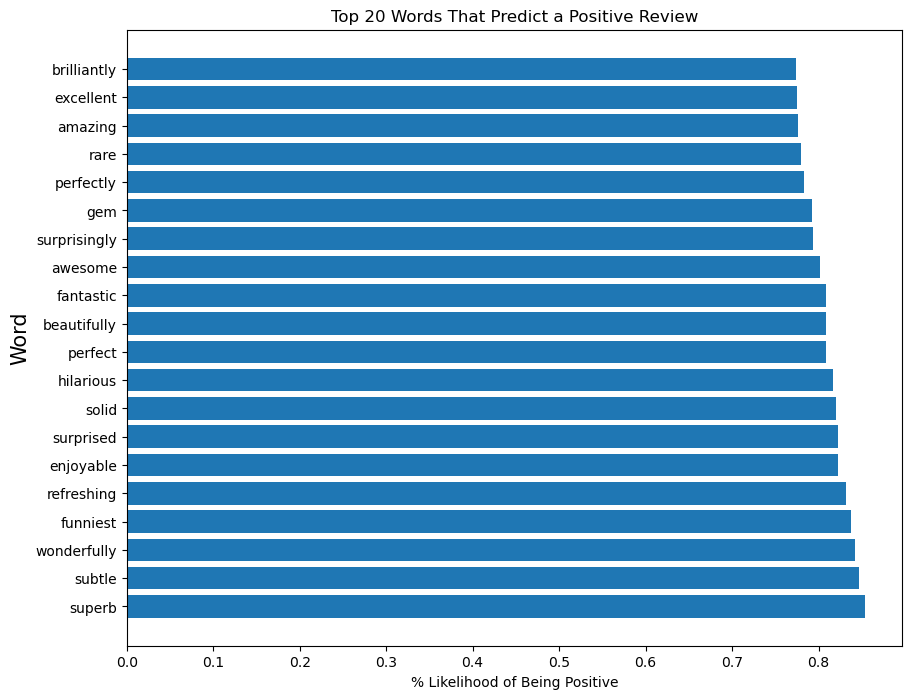

In [71]:
plt.figure(figsize = (10,8))
plt.barh(top_20_pos_words['words'], top_20_pos_words['positive'])
plt.xlabel('% Likelihood of Being Positive', size = 10)
plt.ylabel('Word', size = 15)
plt.title('Top 20 Words That Predict a Positive Review')
plt.show();

In [74]:
top_20_neg_words = word_probs.sort_values('negative', ascending = False).head(20)
top_20_neg_words

,words,negative,positive
86761,waste,0.970583,0.029417
61201,poorly,0.923569,0.076431
22344,disappointment,0.918849,0.081151
44932,lacks,0.916230,0.083770
6330,awful,0.908402,0.091598
22342,disappointing,0.900039,0.099961
88557,worst,0.890042,0.109958
28158,fails,0.878040,0.121960
24367,dull,0.870194,0.129806
6260,avoid,0.854210,0.145790


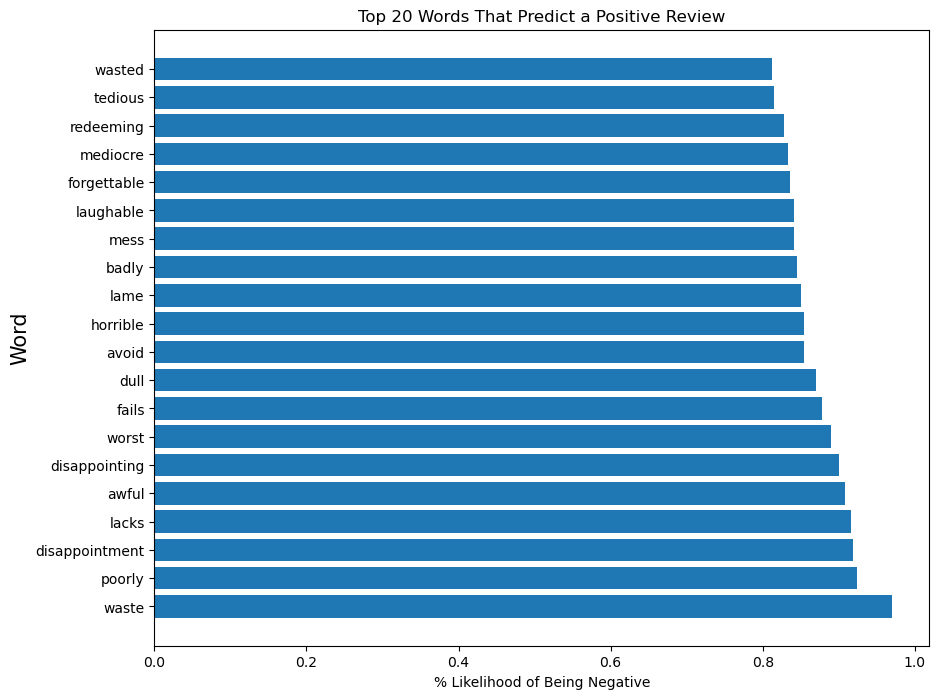

In [77]:
plt.figure(figsize = (10,8))
plt.barh(top_20_neg_words['words'], top_20_neg_words['negative'])
plt.xlabel('% Likelihood of Being Negative', size = 10)
plt.ylabel('Word', size = 15)
plt.title('Top 20 Words That Predict a Positive Review')
plt.show();

### Grid Search over Pipeline

In [9]:
gs = GridSearchCV(pipe, pipe_params, n_jobs = -1)

In [10]:
gs.fit(X_train, y_train)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_features': [5000, 10000, 15000, 20000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english']})

In [11]:
gs.best_score_

0.8768533333333334

In [12]:
gs.best_params_

{'cvec__max_features': 20000,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

### Grid Search Model Evaluation

In [36]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9972, 0.88328)

In [17]:
gs_pred = gs.predict(X_test)

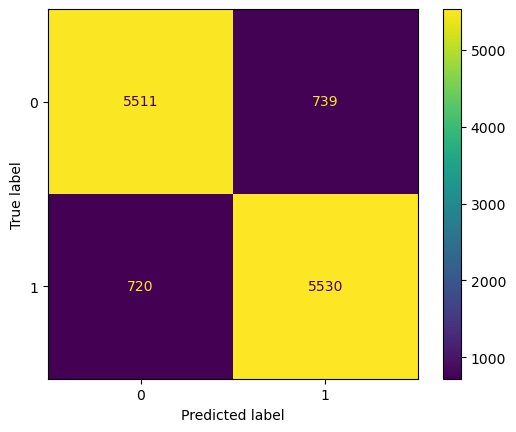

In [37]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test);

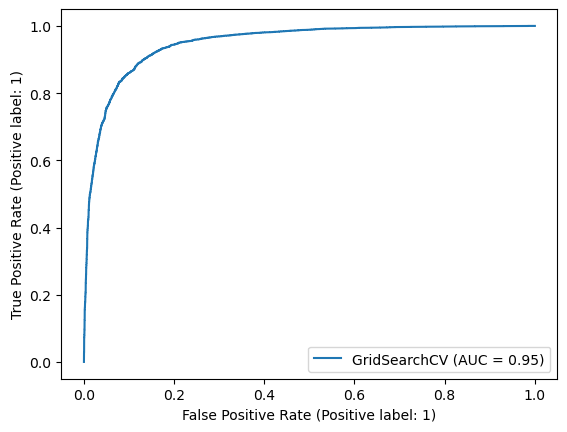

In [39]:
RocCurveDisplay.from_estimator(gs, X_test, y_test);